In [1]:
#import all necessary libraries
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import datetime as dt
from pandas_profiling import ProfileReport
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering, MeanShift, estimate_bandwidth
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz
import matplotlib.cm as cm
from scipy.stats import iqr
from scipy.stats import entropy
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics  
from kmodes.kprototypes import KPrototypes

In [ ]:
#Only to install if not existing in the computer
#!pip install kmodes 

In [2]:
######################################################################### download
#load the csv file and save it into the dataframe donors
mypath=os.path.join("..","data","donors_preprocessed.csv")
donors=pd.read_csv(os.path.join(mypath),index_col = 0, encoding='utf-8-sig')

In [3]:
#to see the features that were kept after the preprocessing
donors.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89778 entries, 95515 to 185114
Data columns (total 156 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   RECPGVG                   int64  
 1   RECSWEEP                  int64  
 2   NUMCHLD                   float64
 3   INCOME                    int64  
 4   HIT                       int64  
 5   SOLP3                     int64  
 6   SOLIH                     int64  
 7   COLLECT1                  int64  
 8   VETERANS                  int64  
 9   BIBLE                     int64  
 10  CATLG                     int64  
 11  HOMEE                     int64  
 12  PETS                      int64  
 13  CDPLAY                    int64  
 14  STEREO                    int64  
 15  PCOWNERS                  int64  
 16  PHOTO                     int64  
 17  CRAFTS                    int64  
 18  FISHER                    int64  
 19  GARDENIN                  int64  
 20  BOATS                 

In [4]:
#to create a dataset without scaling because it will be useful for seing the final results in the original format
donors_withoutscaler = donors.copy()

In [5]:
#definition of non metric features
non_metric_features=['RECPGVG',
 'INCOME',
 'RECSWEEP',
 'SOLP3',
 'SOLIH',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'PEPSTRFL',
 'RFA_2F',
 'RFA_2A',
 'MDMAUD_F',
 'MDMAUD_A',
 '1TIME_DONOR',
 'socio_econ_neighbourhood',
 'STATE_FL',
 'STATE_GA',
 'STATE_IL',
 'STATE_MI',
 'STATE_NC',
 'STATE_Other',
 'STATE_TX',
 'STATE_WA',
 'MDMAUD_R_D',
 'MDMAUD_R_I',
 'MDMAUD_R_L',
 'MDMAUD_R_X',
 'DTSRCE_1',
 'DTSRCE_2',
 'DTSRCE_3',
 'GENDER_M',
 'GENDER_U',
 'urbanicity_level_1',
 'urbanicity_level_2',
 'urbanicity_level_3',
 'urbanicity_level_4',
 'MSA_1600.0',
 'MSA_4480.0',
 'MSA_Other',
 'DMA_803.0',
 'DMA_807.0',
 'DMA_Other',
 'POP90C1',
 'POP90C3']

In [6]:
#number of non metric features kept
len(non_metric_features)

59

In [7]:
#definition of metric features
metric_features=[
 'NUMCHLD',
 'HIT',
 'POP901',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'AGE904',
 'AGE907',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'HU2',
 'HU5',
 'HVP1',
 'HVP2',
 'HVP6',
 'IC3',
 'IC5',
 'IC6',
 'IC7',
 'IC8',
 'IC9',
 'IC10',
 'IC11',
 'IC12',
 'IC13',
 'IC14',
 'PEC1',
 'PEC2',
 'LFC10',
 'OEDC1',
 'OEDC2',
 'OEDC3',
 'OEDC4',
 'OEDC5',
 'OEDC6',
 'OEDC7',
 'EC2',
 'EC3',
 'EC4',
 'EC5',
 'EC6',
 'EC7',
 'EC8',
 'SEC1',
 'SEC2',
 'AFC1',
 'AFC4',
 'ANC1',
 'ANC2',
 'ANC3',
 'ANC4',
 'ANC5',
 'ANC6',
 'ANC7',
 'ANC8',
 'ANC9',
 'ANC10',
 'ANC11',
 'ANC12',
 'ANC13',
 'ANC14',
 'ANC15',
 'POBC1',
 'POBC2',
 'VOC1',
 'VOC2',
 'VOC3',
 'HC15',
 'AC1',
 'AC2',
 'NUMPROM',
 'CARDPM12',
 'NUMPRM12',
 'RAMNTALL',
 'NGIFTALL',
 'MINRAMNT',
 'MAXRAMNT',
 'LASTGIFT',
 'TIMELAG',
 'AVGGIFT',
 'AGE',
 'TENURE']

In [8]:
#number of metric features kept
len(metric_features)

97


# Robust Scaller

In [11]:
# perform a robust scaler transform of the dataset
trans = RobustScaler()
robust_metric_features = trans.fit_transform(donors[metric_features])


# assign to donors the metric features transformed 
donors[metric_features]=robust_metric_features
donors.head()

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,urbanicity_level_1,urbanicity_level_2,urbanicity_level_3,urbanicity_level_4,MSA_1600.0,MSA_4480.0,MSA_Other,DMA_803.0,DMA_807.0,DMA_Other
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0,0,0.0,3,0.000000,-1,-1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15078,0,0,0.0,3,0.666667,-1,-1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
172556,0,0,0.0,1,0.666667,-1,-1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
47784,0,0,0.0,4,0.000000,-1,-1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
62117,0,0,1.0,4,0.000000,-1,-1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Perspectives

In [12]:
#Metric features selected for each perspective
socio_demo_metricfeatures=['AGE','NUMCHLD','IC3','IC5','IC6','IC7','IC11','IC12','IC13','IC14','HVP1','HVP2','HVP6']
behav_metricfeatures = ['HIT','RAMNTALL','NGIFTALL','MINRAMNT','MAXRAMNT','LASTGIFT','TIMELAG','AVGGIFT'] 



In [13]:
#creation of the dataset corrsponding to each perspective
cluster_socio_demographic=donors[socio_demo_metricfeatures]
cluster_behaviour=donors[behav_metricfeatures]

In [15]:
#non metric features selected for each perspective
behav_nonmetricfeatures=['RFA_2F','RFA_2A','MDMAUD_F','MDMAUD_A','MDMAUD_R_D','MDMAUD_R_I','MDMAUD_R_L','MDMAUD_R_X','COLLECT1','BIBLE','CATLG','HOMEE','PETS','CDPLAY','STEREO','PCOWNERS','VETERANS', 'PHOTO','CRAFTS','FISHER','GARDENIN','BOATS','WALKER','KIDSTUFF','CARDS','PLATES', 'SOLP3',
 'SOLIH','1TIMEDONOR']
socio_demo_nonmetricfeatures=['MSA_1600.0','MSA_4480.0','MSA_Other','DMA_803.0','DMA_807.0','DMA_Other''INCOME', 'GENDER_M','GENDER_U','socio_econ_neighbourhood','POP90C1','POP90C3','STATE_FL','STATE_GA','STATE_IL','STATE_MI','STATE_NC','STATE_Other','STATE_TX','STATE_WA', 'urbanicity_level_1','urbanicity_level_2','urbanicity_level_3','urbanicity_level_4']


# PCA

In [17]:
df_pca1 = donors.copy()

In [18]:
# use PCA to reduce dimensionality of dimensions in the perspective of socio demographic
pca = PCA()
pca_feat1 = pca.fit_transform(cluster_socio_demographic)
pca_feat1  

array([[-5.94658196e+00, -7.79826076e-01,  2.23540514e-01, ...,
        -4.21022128e-01,  6.12780647e-02, -1.30883004e-02],
       [-6.01615708e+00, -1.09446914e+00,  4.60078961e-01, ...,
        -5.99887113e-02, -6.74118112e-02, -6.51686379e-03],
       [ 4.18445673e+00, -8.65348742e-01,  9.27816046e-01, ...,
        -1.58780521e-01,  4.64755388e-01, -8.49542951e-02],
       ...,
       [-6.02224150e+00, -1.11234843e+00,  3.01033668e-01, ...,
        -2.52981420e-01, -9.11720065e-02, -4.33958255e-02],
       [ 5.16251544e+00,  5.50830686e+00, -7.82386652e+00, ...,
        -5.45566041e-01, -1.24948085e+00,  1.56257704e-03],
       [-4.77272181e+00,  7.20182654e-01,  4.33037642e-01, ...,
        -3.36926856e-01,  1.20551376e-01, -5.15489903e-02]])

In [19]:
# covariance matrix of the data 
cov_matrix1 = cluster_socio_demographic.cov()


,AGE,NUMCHLD,IC3,IC5,IC6,IC7,IC11,IC12,IC13,IC14,HVP1,HVP2,HVP6
AGE,0.510914,-0.142630,-0.039923,0.000220,0.046578,0.041626,-0.036092,-0.023062,-0.015922,-0.001596,0.002913,-0.005496,0.109240
NUMCHLD,-0.142630,0.396173,0.025480,-0.005956,-0.028035,-0.027292,0.022646,0.012887,0.017149,0.001611,-0.052430,-0.017173,-0.280627
IC3,-0.039923,0.025480,0.640035,0.687023,-0.453336,-0.441461,0.547201,0.654355,0.950948,1.021278,1.494315,0.633549,6.710261
IC5,0.000220,-0.005956,0.687023,1.063668,-0.423191,-0.413532,0.525704,0.724383,1.129688,1.533106,1.995271,0.791885,10.258819
IC6,0.046578,-0.028035,-0.453336,-0.423191,0.506864,0.251701,-0.355150,-0.348208,-0.458275,-0.419547,-0.760376,-0.353844,-2.918734
IC7,0.041626,-0.027292,-0.441461,-0.413532,0.251701,0.590671,-0.403799,-0.425972,-0.571038,-0.545386,-0.954514,-0.420971,-3.894980
IC11,-0.036092,0.022646,0.547201,0.525704,-0.355150,-0.403799,0.665194,0.559534,0.748358,0.662743,1.356519,0.589786,5.457978
IC12,-0.023062,0.012887,0.654355,0.724383,-0.348208,-0.425972,0.559534,1.088294,1.071810,1.103047,1.874021,0.762324,8.678973
IC13,-0.015922,0.017149,0.950948,1.129688,-0.458275,-0.571038,0.748358,1.071810,3.014219,1.879240,2.775382,1.097278,13.872682
IC14,-0.001596,0.001611,1.021278,1.533106,-0.419547,-0.545386,0.662743,1.103047,1.879240,3.371658,3.021466,1.140561,17.036133


In [20]:
pd.DataFrame(pca.components_.T @ np.diag(pca.explained_variance_) @ pca.components_, 
             index=cov_matrix1.index, 
             columns=cov_matrix1.columns)

,AGE,NUMCHLD,IC3,IC5,IC6,IC7,IC11,IC12,IC13,IC14,HVP1,HVP2,HVP6
AGE,0.510914,-0.142630,-0.039923,0.000220,0.046578,0.041626,-0.036092,-0.023062,-0.015922,-0.001596,0.002913,-0.005496,0.109240
NUMCHLD,-0.142630,0.396173,0.025480,-0.005956,-0.028035,-0.027292,0.022646,0.012887,0.017149,0.001611,-0.052430,-0.017173,-0.280627
IC3,-0.039923,0.025480,0.640035,0.687023,-0.453336,-0.441461,0.547201,0.654355,0.950948,1.021278,1.494315,0.633549,6.710261
IC5,0.000220,-0.005956,0.687023,1.063668,-0.423191,-0.413532,0.525704,0.724383,1.129688,1.533106,1.995271,0.791885,10.258819
IC6,0.046578,-0.028035,-0.453336,-0.423191,0.506864,0.251701,-0.355150,-0.348208,-0.458275,-0.419547,-0.760376,-0.353844,-2.918734
IC7,0.041626,-0.027292,-0.441461,-0.413532,0.251701,0.590671,-0.403799,-0.425972,-0.571038,-0.545386,-0.954514,-0.420971,-3.894980
IC11,-0.036092,0.022646,0.547201,0.525704,-0.355150,-0.403799,0.665194,0.559534,0.748358,0.662743,1.356519,0.589786,5.457978
IC12,-0.023062,0.012887,0.654355,0.724383,-0.348208,-0.425972,0.559534,1.088294,1.071810,1.103047,1.874021,0.762324,8.678973
IC13,-0.015922,0.017149,0.950948,1.129688,-0.458275,-0.571038,0.748358,1.071810,3.014219,1.879240,2.775382,1.097278,13.872682
IC14,-0.001596,0.001611,1.021278,1.533106,-0.419547,-0.545386,0.662743,1.103047,1.879240,3.371658,3.021466,1.140561,17.036133


In [21]:
# the obtain the projected observations on the principal components axes
pd.DataFrame(cluster_socio_demographic.values @ pca.components_.T, 
             index=cluster_socio_demographic.index,
             columns=[f"PC{i}" for i in range(pca.n_components_)])

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
CONTROLN,,,,,,,,,,,,,
95515,0.032409,0.048063,0.076828,0.367350,0.531950,0.273109,-0.288900,0.464781,-0.012369,-0.033044,-0.358924,0.175901,-0.003101
15078,-0.037167,-0.266580,0.313367,0.282218,0.741700,0.178783,0.138389,-0.472957,-0.071469,0.078439,0.002110,0.047211,0.003470
172556,10.163447,-0.037460,0.781104,1.177340,0.461150,-0.044094,-0.304821,-0.931066,0.046153,0.230012,-0.096682,0.579378,-0.074967
47784,1.156259,1.084149,0.345851,-0.406311,0.033353,-0.015655,0.017604,-0.269011,-0.049102,-0.168094,-0.045544,0.093323,0.024602
62117,-0.090748,-0.668468,0.081866,-0.056462,0.554457,1.769866,0.122051,0.974273,0.243894,0.303630,-0.100770,0.090044,0.066312
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184568,0.319143,2.679492,0.842074,-0.847326,-0.442449,-0.185004,0.144344,-0.052405,-0.019061,0.519655,0.218866,-0.008831,0.071604
122706,6.322221,8.293777,2.150657,3.362822,-1.011831,0.890884,2.042498,-0.249568,0.332555,2.317344,-0.025481,1.251662,0.131423
189641,-0.043251,-0.284460,0.154321,-0.022499,0.355890,0.167612,0.820599,0.759017,-0.021891,-0.149692,-0.190883,0.023451,-0.033409


In [22]:
# Output PCA table
output=pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)
output

,Eigenvalue,Difference,Proportion,Cumulative
1,281.526612,0.000000,0.958684,0.958684
2,5.074139,-276.452473,0.017279,0.975963
3,2.741909,-2.332231,0.009337,0.985300
4,1.307436,-1.434473,0.004452,0.989752
5,0.944927,-0.362509,0.003218,0.992970
6,0.594447,-0.350480,0.002024,0.994994
7,0.394548,-0.199900,0.001344,0.996338
8,0.314531,-0.080016,0.001071,0.997409
9,0.299188,-0.015343,0.001019,0.998428
10,0.186776,-0.112412,0.000636,0.999064


In [23]:
output.loc[output['Cumulative'] >= 0.79] #we get to 0.80 with 1 components

,Eigenvalue,Difference,Proportion,Cumulative
1,281.526612,0.000000,0.958684,0.958684
2,5.074139,-276.452473,0.017279,0.975963
3,2.741909,-2.332231,0.009337,0.985300
4,1.307436,-1.434473,0.004452,0.989752
5,0.944927,-0.362509,0.003218,0.992970
6,0.594447,-0.350480,0.002024,0.994994
7,0.394548,-0.199900,0.001344,0.996338
8,0.314531,-0.080016,0.001071,0.997409
9,0.299188,-0.015343,0.001019,0.998428
10,0.186776,-0.112412,0.000636,0.999064


<ipython-input-24-b4c1ae71ae58>:22: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-24-b4c1ae71ae58>:24: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=8.0.
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 11.335
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold 

findfont: score(<Font 'Constantia' (constanz.ttf) italic normal bold normal>) = 11.335
findfont: score(<Font 'Rockwell Nova' (RockwellNovaCond-BoldItalic.ttf) italic normal bold condensed>) = 11.535
findfont: score(<Font 'Verdana Pro' (VerdanaPro-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana Pro' (VerdanaPro-CondSemiBold.ttf) normal normal semibold condensed>) = 10.44
findfont: score(<Font 'Arial Nova' (ArialNova-Light.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Wingdings' (wingding.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana Pro' (VerdanaPro-SemiBold.ttf) normal normal semibold normal>) = 10.24
findfont: score(<Font 'Verdana Pro' (VerdanaPro-Bold.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Constantia' (con

None


findfont: score(<Font 'Neue Haas Grotesk Text Pro' (NHaasGroteskTXPro-66MdIt.ttf) italic normal medium normal>) = 11.145
findfont: score(<Font 'Marlett' (marlett.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana Pro' (VerdanaPro-CondSemiBoldItalic.ttf) italic normal semibold condensed>) = 11.44
findfont: score(<Font 'Gill Sans Nova' (GillSansLightNova.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Candara' (Candarali.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Leelawadee UI' (LeelaUIb.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Rockwell Nova' (RockwellNova-ExtraBoldItalic.ttf) italic normal bold normal>) = 11.335
findfont: score(<Font 'Lucida Sans Unicode' (l_10646.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana Pro' (VerdanaPro-BlackItalic.ttf) italic normal black normal>) = 11.525
findfont: score(<Font 'Georgia Pro' (GeorgiaPro-LightItalic.ttf) italic normal light normal>) = 11.24


findfont: score(<Font 'Consolas' (consola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal bold normal>) = 10.335
findfont: score(<Font 'Rockwell Nova' (RockwellNovaCond-Bold.ttf) normal normal bold condensed>) = 10.535
findfont: score(<Font 'Georgia Pro' (GeorgiaPro-SemiBoldItalic.ttf) italic normal semibold normal>) = 11.24
findfont: score(<Font 'Neue Haas Grotesk Text Pro' (NHaasGroteskTXPro-76BdIt.ttf) italic normal bold normal>) = 11.335
findfont: score(<Font 'Gill Sans Nova' (GillSansUltraBoNova.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Arial Nova' (ArialNovaCond-BoldItalic.ttf) italic normal bold condensed>) = 11.535
findfont: score(<Font 'Gill Sans Nova' (GillSansCondItNova.ttf) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'Gill Sans Nova' (GillSansCondUltraBoNova.ttf) normal normal bold condensed>) = 10.535
findfont: score(<Font 'Georgia Pro' (GeorgiaPro-CondBlackItalic.ttf) italic norm

findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Arial Nova' (ArialNovaCond-LightItalic.ttf) italic normal light condensed>) = 11.44
findfont: score(<Font 'Arial Nova' (ArialNovaCond-Bold.ttf) normal normal bold condensed>) = 10.535
findfont: score(<Font 'Consolas' (consolaz.ttf) italic normal bold normal>) = 11.335
findfont: score(<Font 'Verdana Pro' (VerdanaPro-BoldItalic.ttf) italic normal bold normal>) = 11.335
findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Rockwell Nova' (RockwellNovaCond.ttf) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Gill Sans Nova' (GillSansCondExtraNova.ttf) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana Pro' (VerdanaPro-CondLightItalic.ttf) italic normal light condensed>) = 11.44
findfont: sco

findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal roman normal>) = 11.145
findfont: score(<Font 'Cambria' (cambriaz.ttf) italic normal bold normal>) = 11.335
findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal roman normal>) = 11.145
findfont: score(<Font 'Arial' (ariblk.ttf) normal normal black normal>) = 6.888636363636364
findfont: score(<Font 'Microsoft YaHei' (msyh.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial Nova' (ArialNova-LightItalic.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Segoe Print' (segoeprb.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal bold normal>) = 11.335
findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Neue Haas Grotesk Text Pro' (NHaasGroteskTXPro-66MdIt.ttf) italic normal medium normal>) = 11.145
findfont: score(<Font 'Marlett' (marlett.ttf) normal normal 400 normal>) = 10

findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Candara' (Candaral.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal roman normal>) = 10.145
findfont: score(<Font 'Arial Nova' (ArialNova-BoldItalic.ttf) italic normal bold normal>) = 11.335
findfont: score(<Font 'Arial Nova' (ArialNovaCond.ttf) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Verdana Pro' (VerdanaPro-CondLight.ttf) normal normal light condensed>) = 10.44
findfont: score(<Font 'Microsoft JhengHei' (msjhbd.ttc) normal normal bold normal>) = 10.335
findfont: score(<Font 'Georgia Pro' (GeorgiaPro-Bold.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Medium' (framd.ttf) normal normal medium normal>) = 10.145
findfont: score(<Font 'Consolas' (consola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal bold normal>) 

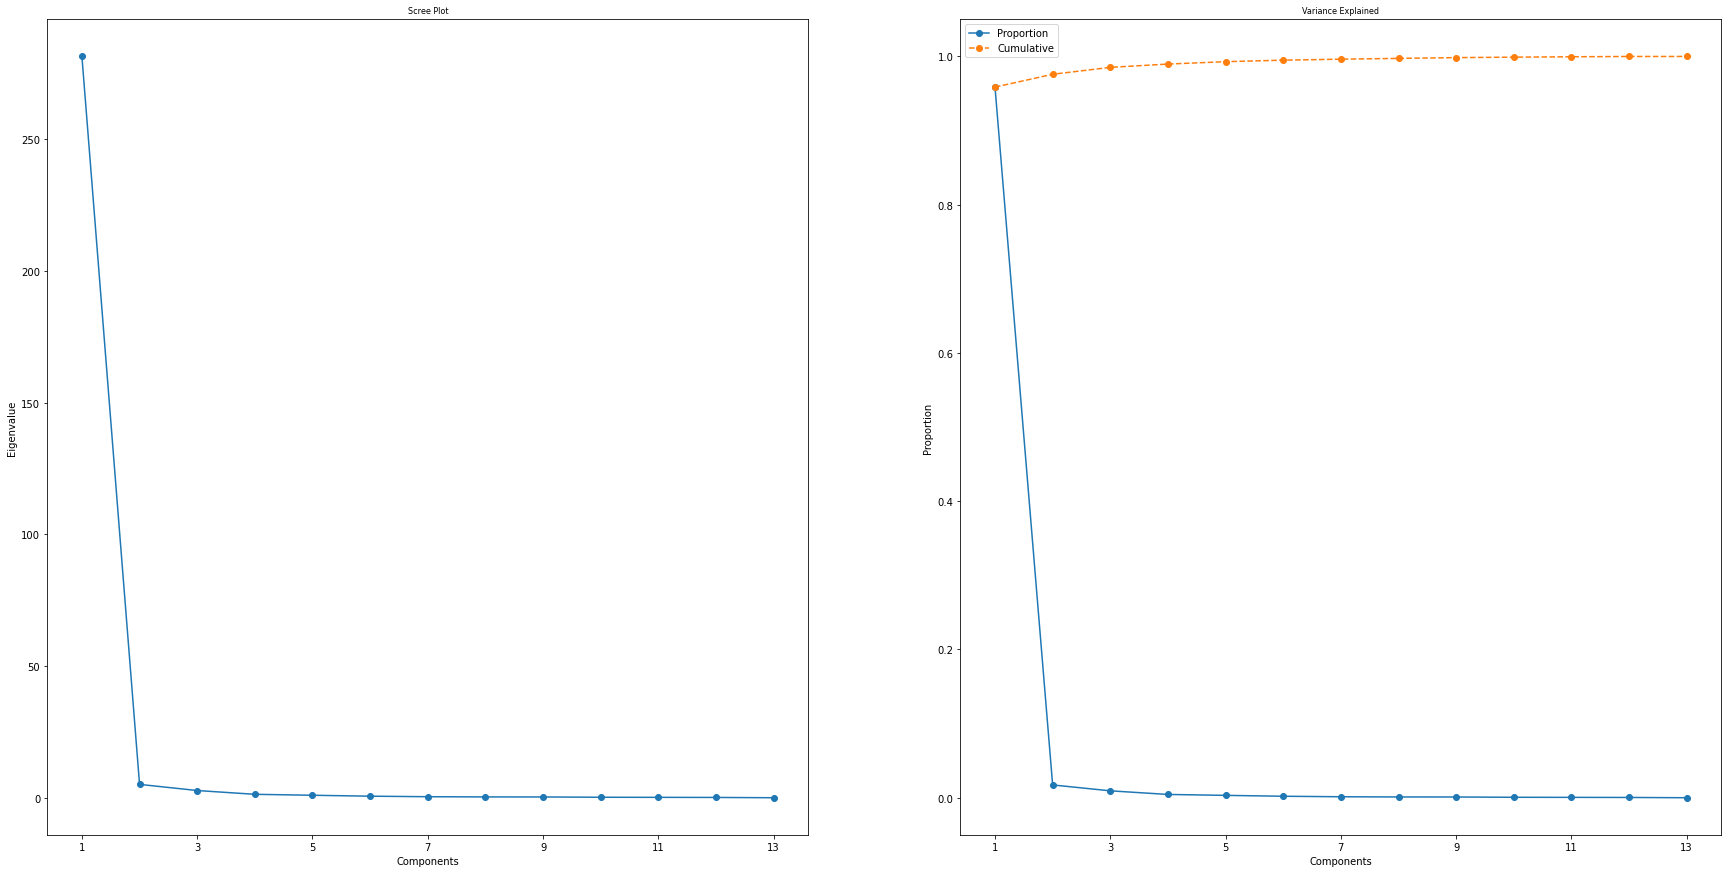

In [24]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=8)
ax2.set_title("Variance Explained", fontsize=8)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [25]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=5)
pca_feat1 = pca.fit_transform(cluster_socio_demographic)
pca_feat_names1 = [f"PC{i}" for i in range(pca.n_components_)]
pca_df1 = pd.DataFrame(pca_feat1, index=df_pca1.index, columns=pca_feat_names1)  # remember index=df_pca.index
pca_df1

,PC0,PC1,PC2,PC3,PC4
CONTROLN,,,,,
95515,-5.946582,-0.779826,0.223541,0.424163,0.118592
15078,-6.016157,-1.094469,0.460079,0.339032,0.328341
172556,4.184457,-0.865349,0.927816,1.234154,0.047792
47784,-4.822732,0.256260,0.492564,-0.349497,-0.380005
62117,-6.069739,-1.496357,0.228579,0.000351,0.141098
...,...,...,...,...,...
184568,-5.659847,1.851603,0.988786,-0.790512,-0.855808
122706,0.343231,7.465888,2.297369,3.419635,-1.425189
189641,-6.022242,-1.112348,0.301034,0.034314,-0.057468


In [26]:
# Reassigning df to contain pca variables

df_pca1 = pd.concat([df_pca1, pca_df1], axis=1)
df_pca1.head()

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,MSA_4480.0,MSA_Other,DMA_803.0,DMA_807.0,DMA_Other,PC0,PC1,PC2,PC3,PC4
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0,0,0.0,3,0.000000,-1,-1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,-5.946582,-0.779826,0.223541,0.424163,0.118592
15078,0,0,0.0,3,0.666667,-1,-1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,-6.016157,-1.094469,0.460079,0.339032,0.328341
172556,0,0,0.0,1,0.666667,-1,-1,0,0,0,...,0.0,1.0,0.0,0.0,1.0,4.184457,-0.865349,0.927816,1.234154,0.047792
47784,0,0,0.0,4,0.000000,-1,-1,0,0,0,...,0.0,1.0,0.0,0.0,1.0,-4.822732,0.256260,0.492564,-0.349497,-0.380005
62117,0,0,1.0,4,0.000000,-1,-1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,-6.069739,-1.496357,0.228579,0.000351,0.141098


In [27]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca1[socio_demo_metricfeatures + pca_feat_names1].corr().loc[socio_demo_metricfeatures, pca_feat_names1]
loadings.style.applymap(_color_red_or_green)

,PC0,PC1,PC2,PC3,PC4
AGE,0.008585,-0.047392,0.005610,0.031804,0.228771
NUMCHLD,-0.026694,0.044365,0.023611,-0.036857,-0.171221
IC3,0.525428,0.738769,0.089507,0.000420,-0.375263
IC5,0.617049,0.604763,0.218781,0.187090,-0.137453
IC6,-0.260265,-0.520210,0.037987,0.031856,0.543647
IC7,-0.319467,-0.530117,0.027247,0.050645,0.464056
IC11,0.420743,0.610739,-0.098697,-0.089655,-0.463024
IC12,0.518574,0.589479,0.038981,-0.038469,-0.303303
IC13,0.498085,0.644869,0.235282,-0.488911,0.201663
IC14,0.574548,0.561992,0.414203,0.388327,0.161378


In [28]:
variables_to_keep=['HVP1', 'HVP2','HVP6', 'IC3','IC5','IC6','IC7','IC11','IC12','IC13','IC14']

# Correlation of features

In [ ]:
#to make sure that the decided variables are not too much correlated 
corr_matrix = donors.corr().abs()
high_corr_var=np.where(corr_matrix>=0.9)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var
#we will drop HVP1

# Updated perspectives

In [30]:
socio_demo_metricfeatures=['IC3','IC5','IC6','IC7','IC11','IC12','IC13','IC14','HVP2','HVP6']
behav_metricfeatures = ['HIT','RAMNTALL','NGIFTALL','MINRAMNT','MAXRAMNT','LASTGIFT','TIMELAG','AVGGIFT'] 
cluster_socio_demographic=donors[socio_demo_metricfeatures]
cluster_behaviour=donors[behav_metricfeatures]

# SOM with socio demographic perspective

In [31]:
np.random.seed(42)

sm_socio = sompy.SOMFactory().build(
    cluster_socio_demographic.values, 
    mapsize=(10, 10),
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=socio_demo_metricfeatures
)
sm_socio.train(n_job=4, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.479000, quantization error: 10.964723

 epoch: 2 ---> elapsed time:  0.397000, quantization error: 2.599205

 epoch: 3 ---> elapsed time:  0.462000, quantization error: 2.372414

 epoch: 4 ---> elapsed time:  0.479000, quantization error: 2.364082

 epoch: 5 ---> elapsed time:  0.504000, quantization error: 2.359799

 epoch: 6 ---> elapsed time:  0.381000, quantization error: 2.355243

 epoch: 7 ---> elapsed time:  0.329000, quantization error: 2.350834

 epoch: 8 ---> elapsed time:  0.345000, quantization error: 2.346654

 epoch: 9 ---> elapsed time:  0.392000, quantization error: 2.342577

 epoch: 10 ---> elapsed time:  0.453000, quantization error: 2.338452

 epoch: 11 ---> elapsed time:  0.362000, quantization error: 2.334260

 epoch: 12 ---> elapsed time:  0.495000, quantization error: 2.329908

 epoch: 13 --->

 epoch: 14 ---> elapsed time:  0.468000, quantization error: 1.218018

 epoch: 15 ---> elapsed time:  0.463000, quantization error: 1.217965

 epoch: 16 ---> elapsed time:  0.435000, quantization error: 1.217925

 epoch: 17 ---> elapsed time:  0.470000, quantization error: 1.217902

 epoch: 18 ---> elapsed time:  0.442000, quantization error: 1.217879

 epoch: 19 ---> elapsed time:  0.444000, quantization error: 1.217868

 epoch: 20 ---> elapsed time:  0.469000, quantization error: 1.217836

 epoch: 21 ---> elapsed time:  0.491000, quantization error: 1.217805

 epoch: 22 ---> elapsed time:  0.472000, quantization error: 1.217766

 epoch: 23 ---> elapsed time:  0.502000, quantization error: 1.217755

 epoch: 24 ---> elapsed time:  0.473000, quantization error: 1.217736

 epoch: 25 ---> elapsed time:  0.484000, quantization error: 1.217716

 epoch: 26 ---> elapsed time:  0.487000, quantization error: 1.217699

 epoch: 27 ---> elapsed time:  0.490000, quantization error: 1.217694

 epoch

In [33]:
# to visualize the Component planes 
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm_socio, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes Socio_Demographic", fontsize=20)
plt.show()
 


<ipython-input-33-9b5e77dbcc44>:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [34]:
# to obtain U-matrix
u = sompy.umatrix.UMatrixView(12, 12, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm_socio, 
    distance2=1, 
    row_normalized=False, 
    show_data=True, 
    contooor=True, 
    blob=False
)

plt.show()


UMAT[1]  

C:\Users\marta\anaconda3\lib\site-packages\sompy\visualization\umatrix.py:98: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-34-0768b7ba9572>:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


array([[0.39940503, 0.42199948, 0.46831599, 0.50121312, 0.56922817,
        0.66189703, 0.76619537, 0.84345788, 0.95226117, 1.05444634],
       [0.38389841, 0.37580778, 0.43224196, 0.47266504, 0.51164192,
        0.56907596, 0.66976274, 0.7426429 , 0.79857249, 0.97682923],
       [0.34515134, 0.38282241, 0.43926727, 0.49372442, 0.54241436,
        0.58865497, 0.64326362, 0.67667546, 0.66932727, 0.74275805],
       [0.2816009 , 0.30686889, 0.36802415, 0.42823973, 0.47848757,
        0.52080759, 0.55927326, 0.59411617, 0.61232664, 0.65183757],
       [0.24972681, 0.26051811, 0.30573567, 0.36303322, 0.41960945,
        0.4577375 , 0.48161532, 0.49887775, 0.49560301, 0.51939822],
       [0.23140386, 0.24772911, 0.27769138, 0.31125359, 0.35909053,
        0.40242303, 0.43006909, 0.44629655, 0.44223286, 0.43970354],
       [0.27418898, 0.269133  , 0.26157304, 0.27466015, 0.31245709,
        0.34528261, 0.364616  , 0.37538288, 0.36585701, 0.3595619 ],
       [0.37163685, 0.34976127, 0.3053838

In [35]:
# To decide how many clusters to use in the clustering we will use the elbow method
range_clusters = range(1, 15)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(cluster_socio_demographic)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution


plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

<ipython-input-35-95c71644d82f>:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [36]:
#K-Means clustering 
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = sm_socio.cluster(kmeans)

hits  = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm_socio, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

<ipython-input-36-f8f52822c8ff>:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [37]:
# To get the nodes and respective clusters
nodes = sm_socio.get_node_vectors()

df_nodes = pd.DataFrame(nodes, columns=socio_demo_metricfeatures)
df_nodes['label'] = nodeclus_labels
df_nodes

,IC3,IC5,IC6,IC7,IC11,IC12,IC13,IC14,HVP2,HVP6,label
0,-0.114459,-0.007196,0.337476,0.103113,-0.034807,0.074903,0.364450,0.363085,2.032653,8.767769,2
1,0.057823,0.108150,0.154224,-0.076622,0.123894,0.164677,0.466696,0.426607,2.102164,7.285531,2
2,0.248749,0.257004,-0.024151,-0.251578,0.315220,0.303167,0.629142,0.520600,2.358699,8.055701,2
3,0.447506,0.451720,-0.172243,-0.413745,0.538097,0.489654,0.869938,0.663704,2.583360,10.389565,2
4,0.626240,0.688515,-0.260598,-0.522401,0.752241,0.744230,1.186457,0.917657,2.771693,15.892681,2
...,...,...,...,...,...,...,...,...,...,...,...
95,-0.137888,-0.119575,0.021060,0.496868,-0.180586,-0.096292,0.193848,0.217917,0.024151,0.288408,0
96,-0.021527,-0.053811,-0.087816,0.217146,-0.107653,-0.068248,0.200994,0.243062,0.028276,0.277774,0
97,0.087632,0.010179,-0.165566,-0.046909,-0.021234,-0.029841,0.226369,0.264590,0.041585,0.285269,0
98,0.195693,0.077949,-0.237821,-0.287360,0.066943,0.018070,0.263155,0.293708,0.061922,0.301409,0


In [38]:
df_nodes.groupby('label').count()

,IC3,IC5,IC6,IC7,IC11,IC12,IC13,IC14,HVP2,HVP6
label,,,,,,,,,,
0,71,71,71,71,71,71,71,71,71,71
1,9,9,9,9,9,9,9,9,9,9
2,20,20,20,20,20,20,20,20,20,20


In [39]:
# to obtain best matching units 
bmus_map = sm_socio.find_bmu(cluster_socio_demographic)[0]  # get bmus for each observation in df

df_bmus = pd.DataFrame(
    np.concatenate((donors, np.expand_dims(bmus_map,1)), axis=1),
    index=donors.index, columns=np.append(donors.columns,"BMU")
)
df_bmus

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,urbanicity_level_2,urbanicity_level_3,urbanicity_level_4,MSA_1600.0,MSA_4480.0,MSA_Other,DMA_803.0,DMA_807.0,DMA_Other,BMU
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0.0,0.0,0.0,3.0,0.000000,-1.0,-1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,44.0
15078,0.0,0.0,0.0,3.0,0.666667,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,32.0
172556,0.0,0.0,0.0,1.0,0.666667,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0
47784,0.0,0.0,0.0,4.0,0.000000,-1.0,-1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,25.0
62117,0.0,0.0,1.0,4.0,0.000000,-1.0,-1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184568,0.0,0.0,0.0,6.0,0.000000,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,38.0
122706,0.0,0.0,1.0,7.0,0.333333,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0
189641,0.0,0.0,0.0,4.0,0.000000,12.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,55.0


In [41]:
# to obtain cluster labels for each observation
df_final_socio = df_bmus.merge(df_nodes['label'], 'left', left_on="BMU", right_index=True)
df_final_socio

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,urbanicity_level_3,urbanicity_level_4,MSA_1600.0,MSA_4480.0,MSA_Other,DMA_803.0,DMA_807.0,DMA_Other,BMU,label
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0.0,0.0,0.0,3.0,0.000000,-1.0,-1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,44.0,0
15078,0.0,0.0,0.0,3.0,0.666667,-1.0,-1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,32.0,0
172556,0.0,0.0,0.0,1.0,0.666667,-1.0,-1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0,1
47784,0.0,0.0,0.0,4.0,0.000000,-1.0,-1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,25.0,2
62117,0.0,0.0,1.0,4.0,0.000000,-1.0,-1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,94.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184568,0.0,0.0,0.0,6.0,0.000000,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,38.0,2
122706,0.0,0.0,1.0,7.0,0.333333,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,1
189641,0.0,0.0,0.0,4.0,0.000000,12.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,55.0,0


In [42]:
# to get the dataset without the obtained labels 
df_final_socio_nolabels=df_final_socio.iloc[:,:-2]

In [43]:
# to define the labels serie
socio_labels=df_final_socio.iloc[:,-1:]

In [44]:
#to transform back to the original data without scalling
iqr_1=iqr(donors_withoutscaler[metric_features].values, axis=0)
median_1=np.median(donors_withoutscaler[metric_features].values, axis=0)

In [45]:
df_kmeans_socio_no_labels=(df_final_socio_nolabels[metric_features]*iqr_1)+median_1

NumExpr defaulting to 8 threads.


In [46]:
df_final_socio_notransf=pd.concat([df_kmeans_socio_no_labels, socio_labels], axis=1)

In [47]:
#the socio demographic perspective
df_final_socio_notransf.groupby(['label'])\
    [metric_features].mean()[socio_demo_metricfeatures]

,IC3,IC5,IC6,IC7,IC11,IC12,IC13,IC14,HVP2,HVP6
label,,,,,,,,,,
0,303.231305,11686.326258,27.898952,20.348536,2.701083,0.700460,0.164882,0.331399,1.887969,0.066404
1,545.544711,23410.048643,12.232686,11.555595,11.104704,5.272178,2.443694,4.903114,64.325530,22.145129
2,425.630223,16576.434182,15.610368,14.983475,6.844046,2.248633,0.945272,1.340371,17.340308,0.550047


In [48]:
#with all the variables
df_final_socio_notransf.groupby(['label']).mean()

,NUMCHLD,HIT,POP901,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,...,NUMPRM12,RAMNTALL,NGIFTALL,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,AGE,TENURE
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,2.683187,3156.555811,51.570358,84.789823,10.116626,0.996027,1.154191,6.659994,0.0,...,12.706010,101.052421,9.967733,7.473702,18.871525,16.424480,11.555616,12.532845,62.909049,8.811653
1,0.0,2.907245,3637.379370,51.030607,86.204744,3.500155,0.422816,6.291102,9.245302,0.0,...,12.896406,106.115917,8.843810,8.660405,21.243433,18.561318,12.458842,14.416686,62.565190,8.477145
2,0.0,2.952246,3280.632862,51.201948,87.927553,5.267986,0.661828,2.716808,7.910399,0.0,...,12.768018,102.567000,9.268049,8.040172,20.181928,17.389119,12.135721,13.443265,61.976217,8.584166


In [50]:
# using R^2
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss 

sst = get_ss(df_final_socio[socio_demo_metricfeatures])  
ssw_labels = df_final_socio[socio_demo_metricfeatures + ["label"]].groupby(by='label').apply(get_ss) 
ssb = sst - np.sum(ssw_labels) 
r2_socio = ssb / sst
r2_socio

0.3371946577759261

In [51]:
#using davies bouldin index
davies_bouldin_score(cluster_socio_demographic, socio_labels)

C:\Users\marta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


1.5573938864969532

In [52]:
davies_bouldin_socio=davies_bouldin_score(cluster_socio_demographic, socio_labels)

C:\Users\marta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [53]:
#using calinski_harabasz
metrics.calinski_harabasz_score(cluster_socio_demographic, socio_labels)

C:\Users\marta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


22836.003629800627

In [54]:
calinski_harabasz_socio=metrics.calinski_harabasz_score(cluster_socio_demographic, socio_labels)

C:\Users\marta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# SOM with behavior perspective

In [55]:

np.random.seed(42)

sm_behav = sompy.SOMFactory().build(
    cluster_behaviour.values, 
    mapsize=(10, 10),
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=behav_metricfeatures
)
sm_behav.train(n_job=4, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.396000, quantization error: 59.596763

 epoch: 2 ---> elapsed time:  0.389000, quantization error: 2.056659

 epoch: 3 ---> elapsed time:  0.413000, quantization error: 1.979512

 epoch: 4 ---> elapsed time:  0.409000, quantization error: 1.942365

 epoch: 5 ---> elapsed time:  0.410000, quantization error: 1.895414

 epoch: 6 ---> elapsed time:  0.396000, quantization error: 1.889820

 epoch: 7 ---> elapsed time:  0.436000, quantization error: 1.886594

 epoch: 8 ---> elapsed time:  0.436000, quantization error: 1.883365

 epoch: 9 ---> elapsed time:  0.498000, quantization error: 1.880039

 epoch: 10 ---> elapsed time:  0.443000, quantization error: 1.876624

 epoch: 11 ---> elapsed time:  0.397000, quantization error: 1.873097

 epoch: 12 ---> elapsed time:  0.412000, quantization error: 1.869421

 epoch: 13 --->

 epoch: 14 ---> elapsed time:  0.410000, quantization error: 0.943607

 epoch: 15 ---> elapsed time:  0.396000, quantization error: 0.943591

 epoch: 16 ---> elapsed time:  0.480000, quantization error: 0.943582

 epoch: 17 ---> elapsed time:  0.478000, quantization error: 0.943570

 epoch: 18 ---> elapsed time:  0.470000, quantization error: 0.943542

 epoch: 19 ---> elapsed time:  0.463000, quantization error: 0.943515

 epoch: 20 ---> elapsed time:  0.484000, quantization error: 0.943495

 epoch: 21 ---> elapsed time:  0.469000, quantization error: 0.943498

 epoch: 22 ---> elapsed time:  0.432000, quantization error: 0.943487

 epoch: 23 ---> elapsed time:  0.478000, quantization error: 0.943487

 epoch: 24 ---> elapsed time:  0.443000, quantization error: 0.943488

 epoch: 25 ---> elapsed time:  0.480000, quantization error: 0.943486

 epoch: 26 ---> elapsed time:  0.483000, quantization error: 0.943490

 epoch: 27 ---> elapsed time:  0.477000, quantization error: 0.943490

 epoch

In [56]:
# to visualize the Component planes 
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm_behav, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes Behaviour", fontsize=20)
plt.show()

<ipython-input-56-204bf37cd5c9>:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [57]:
# to obtain the U-matrix
u = sompy.umatrix.UMatrixView(12, 12, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm_behav, 
    distance2=1, 
    row_normalized=False, 
    show_data=True, 
    contooor=True, # Visualize isomorphic curves
    blob=False
)

plt.show()
UMAT[1]  # U-matrix values

C:\Users\marta\anaconda3\lib\site-packages\sompy\visualization\umatrix.py:98: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-57-f4d7a3bb80db>:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


array([[0.46045486, 0.49333066, 0.5910771 , 0.68388076, 0.72715936,
        0.85823082, 0.731223  , 0.68907534, 0.5755559 , 0.39311261],
       [0.4244407 , 0.42347952, 0.50972175, 0.57308793, 0.5677433 ,
        0.62474598, 0.53349874, 0.57138495, 0.56959218, 0.49776691],
       [0.40124759, 0.43398803, 0.45547925, 0.43997012, 0.38856258,
        0.42675707, 0.45999583, 0.45192916, 0.44111143, 0.46815564],
       [0.36086311, 0.36567325, 0.37593081, 0.36801677, 0.3326126 ,
        0.32208734, 0.32179228, 0.33295072, 0.3687708 , 0.40873282],
       [0.36172367, 0.35576575, 0.33847986, 0.28939184, 0.26096133,
        0.26596755, 0.2630537 , 0.25421494, 0.24493248, 0.26799729],
       [0.33460119, 0.29298711, 0.26596048, 0.24680813, 0.24308298,
        0.24151263, 0.23092686, 0.21381337, 0.19514868, 0.20990832],
       [0.34315671, 0.3032207 , 0.27105619, 0.24956074, 0.24214612,
        0.2331516 , 0.21678275, 0.19425933, 0.17771598, 0.18709432],
       [0.36667384, 0.335545  , 0.2985382

In [58]:
# To decide how many clusters to use in the clustering we will use the elbow method
range_clusters = range(1, 15)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(cluster_behaviour)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution


plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

<ipython-input-58-cc314c15bc29>:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [59]:
#  K-Means clustering on top of SOM  units 
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = sm_behav.cluster(kmeans)

hits  = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm_behav, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

<ipython-input-59-6c4d0eb53a4a>:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [60]:
# nodes and and respective clusters
nodes = sm_behav.get_node_vectors()

df_nodes = pd.DataFrame(nodes, columns=behav_metricfeatures)
df_nodes['label'] = nodeclus_labels
df_nodes

,HIT,RAMNTALL,NGIFTALL,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,label
0,5.911588,0.300505,0.260626,0.187102,0.246668,0.144773,0.257219,0.074716,3
1,4.705186,0.338740,0.157684,0.323024,0.602893,0.413117,0.247615,0.332964,3
2,3.475868,0.528223,0.106199,0.527114,1.221081,0.833800,0.261479,0.747583,3
3,2.208700,0.855858,0.098632,0.755299,2.160988,1.441342,0.310241,1.296377,1
4,1.157460,1.158151,0.069875,1.087457,3.210159,2.119487,0.416872,1.924549,1
...,...,...,...,...,...,...,...,...,...
95,0.242396,0.136931,0.542366,-0.178280,-0.557897,-0.475749,-0.002173,-0.567901,0
96,0.238725,-0.013951,0.314405,-0.136788,-0.533394,-0.447292,-0.025277,-0.521236,2
97,0.246179,-0.135735,0.112167,-0.076643,-0.457473,-0.375569,-0.039446,-0.437639,2
98,0.268371,-0.269771,-0.063721,-0.027100,-0.455311,-0.366713,-0.076501,-0.400225,2


In [61]:
df_nodes.groupby('label').count()

,HIT,RAMNTALL,NGIFTALL,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT
label,,,,,,,,
0,24,24,24,24,24,24,24,24
1,12,12,12,12,12,12,12,12
2,41,41,41,41,41,41,41,41
3,14,14,14,14,14,14,14,14
4,9,9,9,9,9,9,9,9


In [62]:
# to obtain best match unit's labels
bmus_map = sm_behav.find_bmu(cluster_behaviour)[0]  # get bmus for each observation in df

df_bmus = pd.DataFrame(
    np.concatenate((donors, np.expand_dims(bmus_map,1)), axis=1),
    index=donors.index, columns=np.append(donors.columns,"BMU")
)
df_bmus

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,urbanicity_level_2,urbanicity_level_3,urbanicity_level_4,MSA_1600.0,MSA_4480.0,MSA_Other,DMA_803.0,DMA_807.0,DMA_Other,BMU
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0.0,0.0,0.0,3.0,0.000000,-1.0,-1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,90.0
15078,0.0,0.0,0.0,3.0,0.666667,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,90.0
172556,0.0,0.0,0.0,1.0,0.666667,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,40.0
47784,0.0,0.0,0.0,4.0,0.000000,-1.0,-1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,37.0
62117,0.0,0.0,1.0,4.0,0.000000,-1.0,-1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184568,0.0,0.0,0.0,6.0,0.000000,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0
122706,0.0,0.0,1.0,7.0,0.333333,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0
189641,0.0,0.0,0.0,4.0,0.000000,12.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,96.0


In [64]:
# to get cluster labels for each observation
df_final_behav = df_bmus.merge(df_nodes['label'], 'left', left_on="BMU", right_index=True)
df_final_behav

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,urbanicity_level_3,urbanicity_level_4,MSA_1600.0,MSA_4480.0,MSA_Other,DMA_803.0,DMA_807.0,DMA_Other,BMU,label
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0.0,0.0,0.0,3.0,0.000000,-1.0,-1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,90.0,0
15078,0.0,0.0,0.0,3.0,0.666667,-1.0,-1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,90.0,0
172556,0.0,0.0,0.0,1.0,0.666667,-1.0,-1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,40.0,3
47784,0.0,0.0,0.0,4.0,0.000000,-1.0,-1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,37.0,2
62117,0.0,0.0,1.0,4.0,0.000000,-1.0,-1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,83.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184568,0.0,0.0,0.0,6.0,0.000000,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,4
122706,0.0,0.0,1.0,7.0,0.333333,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,4
189641,0.0,0.0,0.0,4.0,0.000000,12.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,96.0,2


In [65]:
# to get the dataset without the obtained labels 
df_final_behav_nolabels=df_final_behav.iloc[:,:-2]

In [66]:
# to define the labels serie
behav_labels=df_final_behav.iloc[:,-2:]

In [67]:
#to transform back to the original data without scalling
iqr_1=iqr(donors_withoutscaler[metric_features].values, axis=0)
median_1=np.median(donors_withoutscaler[metric_features].values, axis=0)

In [68]:
df_kmeans_behav_nolabels=(df_final_behav_nolabels[metric_features]*iqr_1)+median_1

In [69]:
df_kmeans_behav_no_labels=pd.concat([df_kmeans_behav_nolabels, df_final_behav[non_metric_features]], axis=1)

In [70]:
# the behaviour perspective
df_final_behav_nolabels

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,urbanicity_level_1,urbanicity_level_2,urbanicity_level_3,urbanicity_level_4,MSA_1600.0,MSA_4480.0,MSA_Other,DMA_803.0,DMA_807.0,DMA_Other
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0.0,0.0,0.0,3.0,0.000000,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15078,0.0,0.0,0.0,3.0,0.666667,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
172556,0.0,0.0,0.0,1.0,0.666667,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
47784,0.0,0.0,0.0,4.0,0.000000,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
62117,0.0,0.0,1.0,4.0,0.000000,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184568,0.0,0.0,0.0,6.0,0.000000,-1.0,-1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
122706,0.0,0.0,1.0,7.0,0.333333,-1.0,-1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
189641,0.0,0.0,0.0,4.0,0.000000,12.0,-1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [71]:
df_kmeans_behav_no_labels

,NUMCHLD,HIT,POP901,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,...,urbanicity_level_3,urbanicity_level_4,MSA_1600.0,MSA_4480.0,MSA_Other,DMA_803.0,DMA_807.0,DMA_Other,POP90C1,POP90C3
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0.0,0.0,992.0,53.0,92.0,1.0,0.0,0.0,11.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15078,0.0,2.0,7001.0,51.0,96.0,2.0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
172556,0.0,2.0,640.0,46.0,61.0,0.0,0.0,11.0,32.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
47784,0.0,0.0,18172.0,51.0,93.0,6.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
62117,0.0,0.0,1067.0,54.0,99.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184568,0.0,0.0,27380.0,50.0,78.0,10.0,6.0,4.0,5.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
122706,0.0,1.0,1254.0,49.0,91.0,3.0,0.0,2.0,6.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
189641,0.0,0.0,552.0,47.0,82.0,14.0,0.0,1.0,9.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [72]:
#the dataset with the labels 
df_final_behav_notransf=pd.concat([df_kmeans_behav_no_labels,behav_labels], axis=1)

In [73]:
df_final_behav_notransf

,NUMCHLD,HIT,POP901,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,...,MSA_1600.0,MSA_4480.0,MSA_Other,DMA_803.0,DMA_807.0,DMA_Other,POP90C1,POP90C3,BMU,label
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0.0,0.0,992.0,53.0,92.0,1.0,0.0,0.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,90.0,0
15078,0.0,2.0,7001.0,51.0,96.0,2.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,90.0,0
172556,0.0,2.0,640.0,46.0,61.0,0.0,0.0,11.0,32.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,40.0,3
47784,0.0,0.0,18172.0,51.0,93.0,6.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,37.0,2
62117,0.0,0.0,1067.0,54.0,99.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,83.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184568,0.0,0.0,27380.0,50.0,78.0,10.0,6.0,4.0,5.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,9.0,4
122706,0.0,1.0,1254.0,49.0,91.0,3.0,0.0,2.0,6.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,9.0,4
189641,0.0,0.0,552.0,47.0,82.0,14.0,0.0,1.0,9.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,96.0,2


In [74]:
#average value by metric feature

df_final_behav_notransf.groupby(['label'])\
    [metric_features].mean()

,NUMCHLD,HIT,POP901,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,...,NUMPRM12,RAMNTALL,NGIFTALL,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,AGE,TENURE
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.530063,3559.849009,51.416868,87.110101,6.606912,0.823828,2.346303,7.291348,0.0,...,13.940793,161.451638,19.538376,3.619114,14.364867,10.999354,6.431416,8.297249,65.366481,11.450459
1,0.0,1.038698,3475.009691,51.242010,85.094596,7.624118,0.835130,3.165191,7.786356,0.0,...,13.735271,153.378980,7.114427,12.416164,35.912335,30.716946,8.902195,22.592701,61.379573,8.426325
2,0.0,0.137898,3731.233345,51.205417,84.955585,8.048116,0.891319,2.746018,7.930967,0.0,...,12.255776,56.921046,5.682369,5.428779,15.632393,13.938369,6.341465,10.157706,60.837595,7.282582
3,0.0,9.788248,2421.120530,51.655001,86.814735,7.265730,0.586776,2.500048,6.753012,0.0,...,12.842800,93.161178,9.858242,5.633418,16.643479,14.574348,8.248518,10.683492,64.561221,9.248470
4,0.0,1.075688,3470.076298,51.232620,83.686949,8.887451,0.879116,3.049465,8.209988,0.0,...,10.595609,34.992019,2.427023,15.159272,19.300036,18.865526,34.531644,17.195591,59.709615,5.991937


In [75]:
# characterizing the final clusters considering the behaviour metrics
df_final_behav_notransf.drop(columns='BMU').groupby('label').mean()[behav_metricfeatures]

,HIT,RAMNTALL,NGIFTALL,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT
label,,,,,,,,
0,0.530063,161.451638,19.538376,3.619114,14.364867,10.999354,6.431416,8.297249
1,1.038698,153.378980,7.114427,12.416164,35.912335,30.716946,8.902195,22.592701
2,0.137898,56.921046,5.682369,5.428779,15.632393,13.938369,6.341465,10.157706
3,9.788248,93.161178,9.858242,5.633418,16.643479,14.574348,8.248518,10.683492
4,1.075688,34.992019,2.427023,15.159272,19.300036,18.865526,34.531644,17.195591


In [76]:
#relation between clusters and the non metric variable RFA_2A
df_final_behav_notransf.groupby('label')['RFA_2A'].value_counts().unstack()

RFA_2A,0.0,1.0,2.0,3.0
label,,,,
0,4360,9797,5617,916
1,2,104,4105,11371
2,898,4239,12213,482
3,1804,6061,10777,2274
4,29,335,11625,2769


In [77]:
#relation between clusters and the non metric variable RFA_2F
df_final_behav_notransf.groupby('label')['RFA_2F'].value_counts().unstack()

RFA_2F,1.0,2.0,3.0,4.0
label,,,,
0,5723,4764,4659,5544
1,9504,4283,1205,590
2,7304,3904,4231,2393
3,9091,5175,4041,2609
4,13104,1181,351,122


In [78]:
behav_kmeans_label=behav_labels.iloc[:, -1]

In [79]:
behav_kmeans_label

CONTROLN
95515     0
15078     0
172556    3
47784     2
62117     0
         ..
184568    4
122706    4
189641    2
4693      0
185114    1
Name: label, Length: 89778, dtype: int32

In [80]:
# using R^2
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  

sst = get_ss(df_final_behav[behav_metricfeatures]) 
ssw_labels = df_final_behav[behav_metricfeatures + ["label"]].groupby(by='label').apply(get_ss)  
ssb = sst - np.sum(ssw_labels) 
r2_behavior = ssb / sst
r2_behavior

0.2619419526501602

In [81]:
#using davies bouldin index
davies_bouldin_score(cluster_behaviour, behav_kmeans_label)

1.3766068938153426

In [82]:
davies_bouldin_behav=davies_bouldin_score(cluster_behaviour, behav_kmeans_label)

In [83]:
#using calinski_harabasz
metrics.calinski_harabasz_score(cluster_behaviour, behav_kmeans_label)

7965.266078907289

In [84]:
calinski_harabasz_behav=metrics.calinski_harabasz_score(cluster_behaviour, behav_kmeans_label)

# Merging

In [85]:
donors['behavior_labels']= behav_kmeans_label
donors['socio_labels']=socio_kmeans_label

In [86]:
# count label frequencies (contigency table)
donors.groupby(['socio_labels', 'behavior_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('socio_labels','behavior_labels', 0)

behavior_labels,0,1,2,3,4
socio_labels,,,,,
0,12769,7943,10662,11878,8100
1,4412,4879,4132,5151,3937
2,3509,2760,3038,3887,2721


In [87]:
# Percentage
donors.groupby(['socio_labels','behavior_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('socio_labels','behavior_labels', 0).div(len(donors.index)).mul(100)

behavior_labels,0,1,2,3,4
socio_labels,,,,,
0,14.222861,8.847379,11.875961,13.230413,9.022255
1,4.914344,5.434516,4.602464,5.737486,4.385261
2,3.908530,3.074250,3.383903,4.329568,3.030809


In [88]:
# centroids of the concatenated cluster labels
df_centroids = donors.groupby(['socio_labels', 'behavior_labels'])\
    [metric_features].mean()
df_centroids

NUMCHLD       HIT    POP901   POP90C5  \
socio_labels behavior_labels                                           
0            0                0.160467  0.175138  0.862146  0.190174   
             1                0.198917  0.320744  0.838376  0.152293   
             2                0.230351  0.045770  0.928425  0.122147   
             3                0.309564  3.196329  0.288908  0.308245   
             4                0.253457  0.332222  0.819875  0.143374   
1            0                0.140752  0.167044  1.122728  0.030674   
             1                0.192048  0.371524  0.938244 -0.004236   
             2                0.192401  0.042836  1.220830 -0.020490   
             3                0.303825  3.422766  0.588351  0.061024   
             4                0.222250  0.370248  1.003687 -0.029125   
2            0                0.179823  0.194452  0.884030  0.088724   
             1                0.222464  0.374879  0.906879  0.024638   
             2                0.223831  0.050911  0.959712  0.001097   
             3                0.343710  3.253666  0.432346  0.152045   
             4                0.246968  0.420066  0.877174  0.035894   

                                  ETH1      ETH2      ETH3      ETH4  \
socio_labels behavior_labels                                           
0            0               -0.407309  1.224097  1.028741 -0.011708   
             1               -0.604709  1.622372  1.120735  0.109971   
             2               -0.589402  1.591775  1.085913  0.060495   
             3               -0.499517  1.455773  0.723354  0.123758   
             4               -0.726626  1.882222  1.103704  0.138272   
1            0               -0.423738  0.356225  0.458749  2.521985   
             1               -0.468839  0.407187  0.415454  2.785919   
             2               -0.520394  0.451073  0.459584  2.896055   
             3               -0.361082  0.408982  0.367890  2.233256   
             4               -0.515790  0.470240  0.424943  2.886589   
2            0               -0.300275  0.607676  0.537190  0.840695   
             1               -0.406329  0.844082  0.755072  0.870652   
             2               -0.371538  0.695084  0.795589  0.973009   
             3               -0.213927  0.628763  0.459480  0.698225   
             4               -0.458091  0.846441  0.867696  0.969680   

                                  ETH5      ETH6  ...  NUMPRM12  RAMNTALL  \
socio_labels behavior_labels                      ...                       
0            0                0.699742  0.078706  ...  0.888754  0.899932   
             1                0.789647  0.109908  ...  0.795040  0.796403   
             2                0.850794  0.100825  ...  0.120897 -0.230574   
             3                0.722344  0.112814  ...  0.409833  0.180157   
             4                0.867284  0.114568  ... -0.702840 -0.466024   
1            0                1.246449  0.403898  ...  1.156392  1.028422   
             1                1.224807  0.419143  ...  0.979197  0.906823   
             2                1.273596  0.412391  ...  0.135044 -0.207590   
             3                1.031127  0.408853  ...  0.463308  0.196998   
             4                1.304081  0.445263  ... -0.694564 -0.466402   
2            0                1.086349  0.226275  ...  1.033628  0.964910   
             1                1.006944  0.255797  ...  0.879348  0.896206   
             2                1.083992  0.246873  ...  0.142693 -0.217960   
             3                0.688877  0.254952  ...  0.401209  0.154674   
             4                1.144922  0.277472  ... -0.711319 -0.469443   

                              NGIFTALL  MINRAMNT  MAXRAMNT  LASTGIFT  \
socio_labels behavior_labels                                           
0            0                1.272167 -0.207084 -0.365807 -0.418082   
             1                0.020005  1.011771  2.216

In [89]:
#  Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

<ipython-input-90-57c6941be22d>:42: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-90-57c6941be22d>:44: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


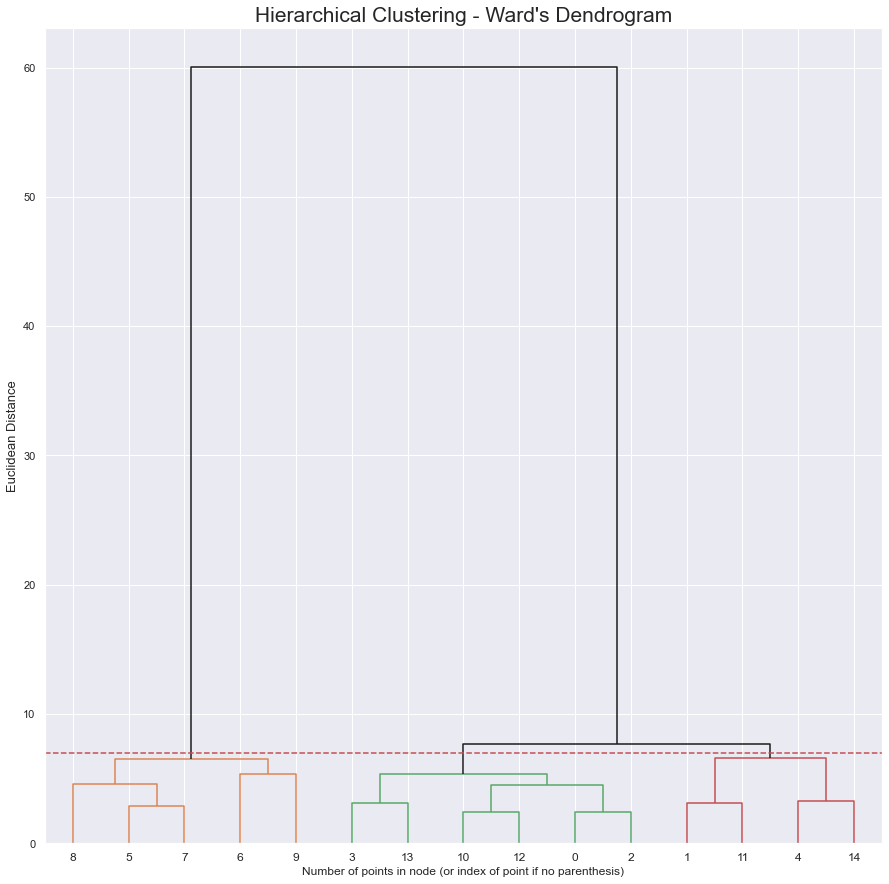

In [90]:
#dendogram
linkage = 'ward'
distance = 'euclidean'

counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)


for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

sns.set()
fig = plt.figure(figsize=(15,15))

y_threshold = 7
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [91]:
# re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=3
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids 

NUMCHLD       HIT    POP901   POP90C5  \
socio_labels behavior_labels                                           
0            0                0.160467  0.175138  0.862146  0.190174   
             1                0.198917  0.320744  0.838376  0.152293   
             2                0.230351  0.045770  0.928425  0.122147   
             3                0.309564  3.196329  0.288908  0.308245   
             4                0.253457  0.332222  0.819875  0.143374   
1            0                0.140752  0.167044  1.122728  0.030674   
             1                0.192048  0.371524  0.938244 -0.004236   
             2                0.192401  0.042836  1.220830 -0.020490   
             3                0.303825  3.422766  0.588351  0.061024   
             4                0.222250  0.370248  1.003687 -0.029125   
2            0                0.179823  0.194452  0.884030  0.088724   
             1                0.222464  0.374879  0.906879  0.024638   
             2                0.223831  0.050911  0.959712  0.001097   
             3                0.343710  3.253666  0.432346  0.152045   
             4                0.246968  0.420066  0.877174  0.035894   

                                  ETH1      ETH2      ETH3      ETH4  \
socio_labels behavior_labels                                           
0            0               -0.407309  1.224097  1.028741 -0.011708   
             1               -0.604709  1.622372  1.120735  0.109971   
             2               -0.589402  1.591775  1.085913  0.060495   
             3               -0.499517  1.455773  0.723354  0.123758   
             4               -0.726626  1.882222  1.103704  0.138272   
1            0               -0.423738  0.356225  0.458749  2.521985   
             1               -0.468839  0.407187  0.415454  2.785919   
             2               -0.520394  0.451073  0.459584  2.896055   
             3               -0.361082  0.408982  0.367890  2.233256   
             4               -0.515790  0.470240  0.424943  2.886589   
2            0               -0.300275  0.607676  0.537190  0.840695   
             1               -0.406329  0.844082  0.755072  0.870652   
             2               -0.371538  0.695084  0.795589  0.973009   
             3               -0.213927  0.628763  0.459480  0.698225   
             4               -0.458091  0.846441  0.867696  0.969680   

                                  ETH5      ETH6  ...  RAMNTALL  NGIFTALL  \
socio_labels behavior_labels                      ...                       
0            0                0.699742  0.078706  ...  0.899932  1.272167   
             1                0.789647  0.109908  ...  0.796403  0.020005   
             2                0.850794  0.100825  ... -0.230574 -0.131092   
             3                0.722344  0.112814  ...  0.180157  0.328885   
             4                0.867284  0.114568  ... -0.466024 -0.453346   
1            0                1.246449  0.403898  ...  1.028422  1.222461   
             1                1.224807  0.419143  ...  0.906823 -0.000041   
             2                1.273596  0.412391  ... -0.207590 -0.133035   
             3                1.031127  0.408853  ...  0.196998  0.218715   
             4                1.304081  0.445263  ... -0.466402 -0.462179   
2            0                1.086349  0.226275  ...  0.964910  1.226589   
             1                1.006944  0.255797  ...  0.896206  0.007101   
             2                1.083992  0.246873  ... -0.217960 -0.132390   
             3                0.688877  0.254952  ...  0.154674  0.243170   
             4                1.144922  0.277472  ... -0.469443 -0.461999   

                              MINRAMNT  MAXRAMNT  LASTGIFT   TIMELAG  \
socio_labels behavior_labels                                           
0            0               -0.207084 -0.365807 -0.418082 -0.066576   
             1                1.011771  2.216604  1.491

In [92]:
# mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = donors.copy()

# mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['socio_labels'], row['behavior_labels'])
    ], axis=1
)

# merged cluster centroids
df_.groupby('merged_labels').mean()[metric_features]

,NUMCHLD,HIT,POP901,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,...,NUMPRM12,RAMNTALL,NGIFTALL,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,AGE,TENURE
merged_labels,,,,,,,,,,,,,,,,,,,,,
0,0.228536,0.344561,0.845102,0.117853,-0.606616,1.522270,1.035449,0.326844,0.891640,0.151552,...,0.051733,0.174094,-0.220716,1.232527,1.290129,0.947665,1.637758,1.156565,-0.275114,-0.129228
1,0.212918,0.969082,0.957654,0.010202,-0.453017,0.416693,0.422816,2.645551,1.207550,0.417129,...,0.448203,0.323510,0.184381,0.522915,0.530429,0.356132,0.606538,0.409249,-0.171740,0.079524
2,0.236736,1.184320,0.700379,0.181398,-0.446677,1.236947,0.861203,0.231412,0.795072,0.130184,...,0.505553,0.316937,0.515930,-0.032132,-0.206051,-0.202879,-0.003850,-0.295297,-0.114044,0.246544


In [93]:
#creating the dataset without the labels
df_nolabels=df_.iloc[:,:-3]

merged_labels=df_.iloc[:,-3:]

In [94]:
#to obtain the not  scalled data
iqr_1=iqr(donors_withoutscaler[metric_features].values, axis=0)
median_1=np.median(donors_withoutscaler[metric_features].values, axis=0)

In [95]:
df_nolabels_transf=(df_nolabels[metric_features]*iqr_1)+median_1

In [96]:
metric_features_clusters=socio_demo_metricfeatures + behav_metricfeatures

In [97]:
#dataset with only the behaviour and socio demographic perspectives
df_nolabels_transf

,NUMCHLD,HIT,POP901,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,...,NUMPRM12,RAMNTALL,NGIFTALL,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,AGE,TENURE
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0.0,0.0,992.0,53.0,92.0,1.0,0.0,0.0,11.0,0.0,...,14.0,240.0,31.0,5.0,12.0,10.0,4.0,7.741935,63.0,11.0
15078,0.0,2.0,7001.0,51.0,96.0,2.0,0.0,0.0,2.0,0.0,...,14.0,202.0,27.0,2.0,16.0,5.0,12.0,7.481481,66.0,10.0
172556,0.0,2.0,640.0,46.0,61.0,0.0,0.0,11.0,32.0,0.0,...,14.0,109.0,16.0,2.0,11.0,10.0,9.0,6.812500,72.0,13.0
47784,0.0,0.0,18172.0,51.0,93.0,6.0,1.0,1.0,1.0,0.0,...,12.0,51.0,4.0,10.0,16.0,15.0,6.0,12.750000,66.0,6.0
62117,0.0,0.0,1067.0,54.0,99.0,0.0,0.0,0.0,1.0,0.0,...,9.0,107.0,14.0,3.0,12.0,11.0,4.0,7.642857,40.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184568,0.0,0.0,27380.0,50.0,78.0,10.0,6.0,4.0,5.0,0.0,...,12.0,25.0,1.0,25.0,25.0,25.0,45.0,25.000000,66.0,4.0
122706,0.0,1.0,1254.0,49.0,91.0,3.0,0.0,2.0,6.0,0.0,...,8.0,20.0,1.0,20.0,20.0,20.0,45.0,20.000000,50.0,4.0
189641,0.0,0.0,552.0,47.0,82.0,14.0,0.0,1.0,9.0,0.0,...,17.0,58.0,7.0,3.0,10.0,10.0,3.0,8.285714,62.0,6.0


In [98]:
#all dataset
df_nolabels_metric_nonmetric=pd.concat([df_nolabels_transf, df_[non_metric_features]], axis=1)


In [99]:
#dataset with merged labels

df_merged=pd.concat([df_nolabels_metric_nonmetric,merged_labels], axis=1)


In [100]:
merged_labels

,behavior_labels,socio_labels,merged_labels
CONTROLN,,,
95515,0,0,2
15078,0,0,2
172556,3,1,1
47784,2,2,2
62117,0,0,2
...,...,...,...
184568,4,2,0
122706,4,1,1
189641,2,0,2


In [101]:
#dataset with average per merged label for behaviour and socio demographic metric features
df_merged.groupby('merged_labels').mean()[metric_features_clusters]

,IC3,IC5,IC6,IC7,IC11,IC12,IC13,IC14,HVP2,HVP6,HIT,RAMNTALL,NGIFTALL,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT
merged_labels,,,,,,,,,,,,,,,,,,
0,334.576240,12880.475376,24.816623,18.907359,3.792464,1.101143,0.352119,0.574754,6.076705,0.200520,1.033683,92.668497,4.792836,13.627692,27.321035,24.476654,21.739825,19.612312
1,545.544711,23410.048643,12.232686,11.555595,11.104704,5.272178,2.443694,4.903114,64.325530,22.145129,2.907245,106.115917,8.843810,8.660405,21.243433,18.561318,12.458842,14.416686
2,331.067486,12825.805566,25.073847,19.160046,3.628971,1.050565,0.348294,0.567934,5.293203,0.171567,3.552959,105.524365,12.159303,4.775078,15.351595,12.971214,6.965350,9.518414


In [102]:
# size of the clusters by number of donors belonging to each
df_counts = df_.groupby('merged_labels')\
.size()\
.to_frame()

df_counts.rename(columns={0: "Size"},inplace=True)

merged_dict = {}
for k, v in cluster_mapper.items():
    merged_dict.setdefault(v, []).append(k)



df_counts = df_counts\
.rename(merged_dict)\
.reset_index()

df_counts

,merged_labels,Size
0,"[(0, 1), (0, 4), (2, 1), (2, 4)]",21524
1,"[(1, 0), (1, 1), (1, 2), (1, 3), (1, 4)]",22511
2,"[(0, 0), (0, 2), (0, 3), (2, 0), (2, 2), (2, 3)]",45743


In [103]:
merged=merged_labels.iloc[:,-1]

In [104]:
merged

CONTROLN
95515     2
15078     2
172556    1
47784     2
62117     2
         ..
184568    0
122706    1
189641    2
4693      1
185114    0
Name: merged_labels, Length: 89778, dtype: int64

In [105]:
donors_visualizations=pd.concat([df_nolabels_metric_nonmetric, merged], axis=1)

# Mean shift with behaviour perspective


In [107]:

bandwidth = estimate_bandwidth(cluster_behaviour, quantile=0.06, random_state=1, n_jobs=-1)
bandwidth

# mean-shift clustering 
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4, min_bin_freq=10)
ms_labels_behav = ms.fit_predict(cluster_behaviour)

ms_n_clusters = len(np.unique(ms_labels_behav))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 6


In [108]:
# concatenating the labels to the dataset
df_mean_shift=donors.copy()
df_mean_shift = pd.concat([df_mean_shift, pd.Series(ms_labels_behav, index=df_mean_shift.index, name="ms_labels_behav")], axis=1)
df_mean_shift

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,urbanicity_level_4,MSA_1600.0,MSA_4480.0,MSA_Other,DMA_803.0,DMA_807.0,DMA_Other,behavior_labels,socio_labels,ms_labels_behav
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0,0,0.0,3,0.000000,-1,-1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
15078,0,0,0.0,3,0.666667,-1,-1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
172556,0,0,0.0,1,0.666667,-1,-1,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3,1,0
47784,0,0,0.0,4,0.000000,-1,-1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,2,0
62117,0,0,1.0,4,0.000000,-1,-1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184568,0,0,0.0,6,0.000000,-1,-1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4,2,1
122706,0,0,1.0,7,0.333333,-1,-1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4,1,1
189641,0,0,0.0,4,0.000000,12,-1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,0,0


In [109]:
df_mean_shift.drop('behavior_labels',axis=1, inplace=True)

In [110]:
df_mean_shift.drop('socio_labels',axis=1, inplace=True)

In [111]:
#dataset with only the mean shift label
df_mean_shift

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,urbanicity_level_2,urbanicity_level_3,urbanicity_level_4,MSA_1600.0,MSA_4480.0,MSA_Other,DMA_803.0,DMA_807.0,DMA_Other,ms_labels_behav
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0,0,0.0,3,0.000000,-1,-1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
15078,0,0,0.0,3,0.666667,-1,-1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
172556,0,0,0.0,1,0.666667,-1,-1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
47784,0,0,0.0,4,0.000000,-1,-1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
62117,0,0,1.0,4,0.000000,-1,-1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184568,0,0,0.0,6,0.000000,-1,-1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
122706,0,0,1.0,7,0.333333,-1,-1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
189641,0,0,0.0,4,0.000000,12,-1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0


In [112]:
# using R^2

def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss 

sst = get_ss(df_mean_shift)  
ssw_labels = df_mean_shift.groupby(by='ms_labels_behav').apply(get_ss)  
ssb = sst - np.sum(ssw_labels) 
r2_mean_shift_behav = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2_mean_shift_behav)


Cluster solution with R^2 of 0.0179


In [113]:
#using davies bouldin index
davies_bouldin_score(cluster_behaviour, ms_labels_behav)

1.229242458206498

In [114]:
davies_bouldin_ms_behav=davies_bouldin_score(cluster_behaviour, ms_labels_behav)

In [115]:
#using calinski_harabasz
metrics.calinski_harabasz_score(cluster_behaviour, ms_labels_behav)

7897.78418548764

In [116]:
calinski_harabasz_ms_behav=metrics.calinski_harabasz_score(cluster_behaviour, ms_labels_behav)

# Mean shift  with socio demographic perspective


In [117]:
bandwidth = estimate_bandwidth(cluster_socio_demographic, quantile=0.06, random_state=1, n_jobs=-1)
bandwidth

# mean-shift clustering 
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4, min_bin_freq=10)
ms_labels_socio = ms.fit_predict(cluster_socio_demographic)

ms_n_clusters = len(np.unique(ms_labels_socio))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 12


In [118]:
# concatenating the labels to the dataframe
df_mean_shift = pd.concat([df_mean_shift, pd.Series(ms_labels_socio, index=df_mean_shift.index, name="ms_labels_socio")], axis=1)
df_mean_shift.head()

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,urbanicity_level_3,urbanicity_level_4,MSA_1600.0,MSA_4480.0,MSA_Other,DMA_803.0,DMA_807.0,DMA_Other,ms_labels_behav,ms_labels_socio
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0,0,0.0,3,0.000000,-1,-1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
15078,0,0,0.0,3,0.666667,-1,-1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
172556,0,0,0.0,1,0.666667,-1,-1,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
47784,0,0,0.0,4,0.000000,-1,-1,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
62117,0,0,1.0,4,0.000000,-1,-1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0


In [119]:
# using R^2

def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  

sst = get_ss(df_mean_shift)  
ssw_labels = df_mean_shift.groupby(by='ms_labels_socio').apply(get_ss)  
ssb = sst - np.sum(ssw_labels)  
r2_mean_shift_socio = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2_mean_shift_socio)

Cluster solution with R^2 of 0.5608


In [120]:
#using davies bouldin index
davies_bouldin_score(cluster_socio_demographic, ms_labels_socio)

1.0581492728154076

In [121]:
davies_bouldin_ms_socio=davies_bouldin_score(cluster_socio_demographic, ms_labels_socio)

In [122]:
#using calinski_harabasz
metrics.calinski_harabasz_score(cluster_socio_demographic, ms_labels_socio)

120211.32139732309

In [123]:
calinski_harabasz_ms_socio=metrics.calinski_harabasz_score(cluster_socio_demographic, ms_labels_socio)

In [124]:
df_mean_shift

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,urbanicity_level_3,urbanicity_level_4,MSA_1600.0,MSA_4480.0,MSA_Other,DMA_803.0,DMA_807.0,DMA_Other,ms_labels_behav,ms_labels_socio
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0,0,0.0,3,0.000000,-1,-1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
15078,0,0,0.0,3,0.666667,-1,-1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
172556,0,0,0.0,1,0.666667,-1,-1,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
47784,0,0,0.0,4,0.000000,-1,-1,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
62117,0,0,1.0,4,0.000000,-1,-1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184568,0,0,0.0,6,0.000000,-1,-1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0
122706,0,0,1.0,7,0.333333,-1,-1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0
189641,0,0,0.0,4,0.000000,12,-1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0


In [125]:
df_mean_shift.drop('ms_labels_behav', axis=1, inplace=True)

In [126]:
#dataset with only the socio demographic mean-shift label
df_mean_shift

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,urbanicity_level_2,urbanicity_level_3,urbanicity_level_4,MSA_1600.0,MSA_4480.0,MSA_Other,DMA_803.0,DMA_807.0,DMA_Other,ms_labels_socio
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0,0,0.0,3,0.000000,-1,-1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
15078,0,0,0.0,3,0.666667,-1,-1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
172556,0,0,0.0,1,0.666667,-1,-1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
47784,0,0,0.0,4,0.000000,-1,-1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
62117,0,0,1.0,4,0.000000,-1,-1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184568,0,0,0.0,6,0.000000,-1,-1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
122706,0,0,1.0,7,0.333333,-1,-1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
189641,0,0,0.0,4,0.000000,12,-1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0


# K-prototypes

In [127]:
#the non metric features
behav_nonmetricfeatures=['RFA_2F','RFA_2A','MDMAUD_F','MDMAUD_A','MDMAUD_R_D','MDMAUD_R_I','MDMAUD_R_L','MDMAUD_R_X','COLLECT1','BIBLE','CATLG','HOMEE','PETS','CDPLAY','STEREO','PCOWNERS','VETERANS', 'PHOTO','CRAFTS','FISHER','GARDENIN','BOATS','WALKER','KIDSTUFF','CARDS','PLATES', 'SOLP3',
 'SOLIH','1TIME_DONOR']
socio_demo_nonmetricfeatures=['MSA_1600.0','MSA_4480.0','MSA_Other','DMA_803.0','DMA_807.0','DMA_Other','INCOME', 'GENDER_M','GENDER_U','socio_econ_neighbourhood','POP90C1','POP90C3','STATE_FL','STATE_GA','STATE_IL','STATE_MI','STATE_NC','STATE_Other','STATE_TX','STATE_WA', 'urbanicity_level_1','urbanicity_level_2','urbanicity_level_3','urbanicity_level_4']


In [128]:
#a new copy of the databse
kprot_data = donors.copy()

In [129]:
#create a dataframe for each perspective
kprot_data_behav=kprot_data[behav_nonmetricfeatures + behav_metricfeatures]

In [130]:
#create a dataframe for each perspective
kprot_data_socio=kprot_data[socio_demo_nonmetricfeatures + socio_demo_metricfeatures]


In [131]:

#obtaining  the index of the categorical features 

[kprot_data_socio[socio_demo_nonmetricfeatures].columns.get_loc(c) for c in socio_demo_nonmetricfeatures if c in kprot_data_socio[socio_demo_nonmetricfeatures]]



[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [132]:
socio_categoricals=[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [133]:
#obtaining  the index of the categorical features 

[kprot_data_behav[behav_nonmetricfeatures].columns.get_loc(c) for c in behav_nonmetricfeatures if c in kprot_data_behav[behav_nonmetricfeatures]]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [134]:
behav_categoricals=[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [135]:
#K-prototypes clustering on social perspective
kproto = KPrototypes(n_clusters= 3 , init='Cao', n_jobs = 4)
kpro_cluster_socio = kproto.fit_predict(kprot_data_socio, categorical=socio_categoricals)






You should consider upgrading via the 'C:\Users\marta\anaconda3\python.exe -m pip install --upgrade pip' command.


In [136]:
#number of donors per cluster
pd.Series(kpro_cluster_socio).value_counts()

2    81019
0     5265
1     3494
dtype: int64

In [137]:
#K-prototypes clustering on behaviour perspective
kproto = KPrototypes(n_clusters= 5 , init='Cao', n_jobs = 4)
kpro_cluster_behav = kproto.fit_predict(kprot_data_behav, categorical=behav_categoricals)


#number of donors per cluster
pd.Series(kpro_cluster_behav).value_counts()

You should consider upgrading via the 'C:\Users\marta\anaconda3\python.exe -m pip install --upgrade pip' command.


4    66823
0    10021
3     9957
2     2975
1        2
dtype: int64

In [138]:
#labels for socio demographic perspective
kpro_cluster_socio

array([2, 2, 2, ..., 2, 2, 2], dtype=uint16)

In [139]:
#labels for behaviour perspective
kpro_cluster_behav

array([4, 4, 4, ..., 4, 4, 2], dtype=uint16)

In [140]:
#dataset with labels
kprot_data_socio_label=pd.concat((kprot_data_socio, pd.Series(kpro_cluster_socio, name='socio_labels', index=kprot_data_socio.index)), axis=1)

In [141]:
#dataset with labels
kprot_data_behav_label=pd.concat((kprot_data_behav, pd.Series(kpro_cluster_behav, name='behav_labels', index=kprot_data_behav.index)), axis=1)

In [142]:
#to transform to the not scalled data
iqr_1=iqr(donors_withoutscaler[metric_features].values, axis=0)
median_1=np.median(donors_withoutscaler[metric_features].values, axis=0)

kprot_data_notransf=(kprot_data[metric_features]*iqr_1)+median_1

In [143]:
kprot_data_socio_label_notransf=pd.concat((kprot_data_notransf, pd.Series(kpro_cluster_socio, name='socio_labels', index=kprot_data_socio.index)), axis=1)

In [144]:
kprot_data_behav_label_notransf=pd.concat((kprot_data_notransf, pd.Series(kpro_cluster_behav, name='behav_labels', index=kprot_data_notransf.index)), axis=1)

In [145]:
#clustering result for behaviour perspective
kprot_data_behav_label_notransf.groupby(by='behav_labels').mean()[behav_metricfeatures]

,HIT,RAMNTALL,NGIFTALL,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT
behav_labels,,,,,,,,
0,1.483385,26.637713,1.357549,19.227704,20.510294,20.312776,42.791937,19.870631
1,0.000000,7915.785000,9.500000,31.285000,3801.000000,55.000000,3.500000,826.837222
2,2.058824,308.513671,9.572437,20.016464,70.416262,56.115946,12.064202,39.006437
3,15.645877,111.969615,11.095912,6.155264,18.068632,15.647830,9.071005,11.628158
4,1.099038,103.181471,10.563189,5.883048,17.448535,15.138453,7.661569,11.215708


In [146]:
#clustering result for the socio demographic perspective
kprot_data_socio_label_notransf.groupby(by='socio_labels').mean()[socio_demo_metricfeatures]

,IC3,IC5,IC6,IC7,IC11,IC12,IC13,IC14,HVP2,HVP6
socio_labels,,,,,,,,,,
0,559.276733,24749.970370,12.496106,11.380057,11.566192,5.751757,2.596771,5.622412,83.164103,30.575119
1,655.577848,32277.268460,10.013452,8.906411,13.506297,7.917287,4.105896,9.672868,96.560389,76.464797
2,362.766944,14167.397907,22.904467,17.927807,4.807761,1.635332,0.623348,1.053148,12.907009,1.018613


In [147]:
# using R^2
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  
sst = get_ss(kprot_data_behav_label[behav_metricfeatures]) 
ssw_labels = kprot_data_behav_label[behav_metricfeatures + ["behav_labels"]].groupby(by='behav_labels').apply(get_ss)  
ssb = sst - np.sum(ssw_labels)  
r2_kp_behavior = ssb / sst
r2_kp_behavior

0.5629929005190301

In [148]:
# using R^2
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  

sst = get_ss(kprot_data_socio_label[socio_demo_metricfeatures])  
ssw_labels = kprot_data_socio_label[socio_demo_metricfeatures + ["socio_labels"]].groupby(by='socio_labels').apply(get_ss)  
ssb = sst - np.sum(ssw_labels)  
r2_kp_socio = ssb / sst
r2_kp_socio

0.8996830308028253

In [149]:
#using davies bouldin index on the behaviour cluster

davies_bouldin_score(cluster_behaviour, kpro_cluster_behav)

0.8222759318492278

In [150]:
davies_bouldin_kp_behav=davies_bouldin_score(cluster_behaviour, kpro_cluster_behav)

In [151]:
#using davies bouldin index on the socio demographic cluster

davies_bouldin_score(cluster_socio_demographic,  kpro_cluster_socio)

0.4968560681437016

In [152]:
davies_bouldin_kp_socio=davies_bouldin_score(cluster_socio_demographic,kpro_cluster_socio)

In [153]:
#using calinski_harabasz on the behaviour cluster

metrics.calinski_harabasz_score(cluster_behaviour, kpro_cluster_behav)

28913.46714867169

In [154]:
calinski_harabasz_kp_behav=metrics.calinski_harabasz_score(cluster_behaviour, kpro_cluster_behav)

In [155]:
#using calinski_harabasz on the demographic cluster

metrics.calinski_harabasz_score(cluster_socio_demographic, kpro_cluster_socio)

402569.20008960663

In [156]:
calinski_harabasz_kp_socio=metrics.calinski_harabasz_score(cluster_socio_demographic, kpro_cluster_socio)

# Performance comparison

In [157]:
data={'kmeans_socio_demographic':[r2_socio, calinski_harabasz_socio, davies_bouldin_socio],'mean_shift_socio_demographic':[r2_mean_shift_socio , calinski_harabasz_ms_socio, davies_bouldin_ms_socio],'k-prototype_socio_demographic':[r2_kp_socio,calinski_harabasz_kp_socio,davies_bouldin_kp_socio ],'kmeans_behaviour':[r2_behavior, calinski_harabasz_behav, davies_bouldin_behav], 'mean_shift_behaviour':[r2_mean_shift_behav, calinski_harabasz_ms_behav, davies_bouldin_ms_behav],'k-prototype_behaviour':[r2_kp_behavior,calinski_harabasz_kp_behav, davies_bouldin_kp_behav ]}
performance=pd.DataFrame(data).from_dict(data, orient='index', columns=['r2_score','calinski_harabasz_score','davies_bouldin_score'])
performance

,r2_score,calinski_harabasz_score,davies_bouldin_score
kmeans_socio_demographic,0.337195,22836.003630,1.557394
mean_shift_socio_demographic,0.560782,120211.321397,1.058149
k-prototype_socio_demographic,0.899683,402569.200090,0.496856
kmeans_behaviour,0.261942,7965.266079,1.376607
mean_shift_behaviour,0.017866,7897.784185,1.229242
k-prototype_behaviour,0.562993,28913.467149,0.822276


# Interpretation of non metric features

In [158]:
behav_nonmetricfeatures=['RFA_2F','RFA_2A','MDMAUD_F','MDMAUD_A','MDMAUD_R_D','MDMAUD_R_I','MDMAUD_R_L','MDMAUD_R_X','COLLECT1','BIBLE','CATLG','HOMEE','PETS','CDPLAY','STEREO','PCOWNERS','VETERANS', 'PHOTO','CRAFTS','FISHER','GARDENIN','BOATS','WALKER','KIDSTUFF','CARDS','PLATES', 'SOLP3',
 'SOLIH','1TIME_DONOR']
socio_demo_nonmetricfeatures=['MSA_1600.0','MSA_4480.0','MSA_Other','DMA_803.0','DMA_807.0','DMA_Other','INCOME', 'GENDER_M','GENDER_U','socio_econ_neighbourhood','POP90C1','POP90C3','STATE_FL','STATE_GA','STATE_IL','STATE_MI','STATE_NC','STATE_Other','STATE_TX','STATE_WA', 'urbanicity_level_1','urbanicity_level_2','urbanicity_level_3','urbanicity_level_4']

In [159]:
#graphs for the non metric features for the behaviour perspective
for var in behav_nonmetricfeatures:
    metric_feature = sns.countplot(data=donors_visualizations, x= 'merged_labels', hue=var)
    plt.show()
    figure = metric_feature.get_figure()  
    name = 'barplot_'+var+'.png'
    figure.savefig(name, dpi=400)

<ipython-input-159-3ad41b318999>:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [160]:
#graphs for the non metric features for the socio demographic perspective
for var in socio_demo_nonmetricfeatures:
    metric_feature = sns.countplot(data=donors_visualizations, x= 'merged_labels', hue=var)
    plt.show()
    figure = metric_feature.get_figure()  
    name = 'barplot_'+var+'.png'
    figure.savefig(name, dpi=400)

<ipython-input-160-6c3b3d22b025>:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
